## Binomial Image Classifier: 
### Training a convolutional neural network - ConvNet, CNN - from scratch
Having to train your own image-classification model instead of using a pretrained one is a good skill to have. You simply do your best with what little data you have available. Here I demonstrate an example with the Dogs vs. Cats dataset, downloaded from https://www.kaggle.com/c/dogs-vs-cats/data. The pictures are medium resolution JPEGs. The original dataset contains 25.000 images, 12.500 from each group. Here I've used 9.000 images of each = 18.000. I then create a new dataset containing of three subsets; one for training with 1000, one for validation with 500 and one for testing with 500 samples of each class; cats & dogs.<br><br>
The original source code is from Francois Chollet's book "Deep Learning with Python". I had to make a few tweaks to it to make it work with my slightly adjusted dataset. Furthermore I've added more comments for pedagogical reasons. https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438<br><br>
Here a sample of the cat images:

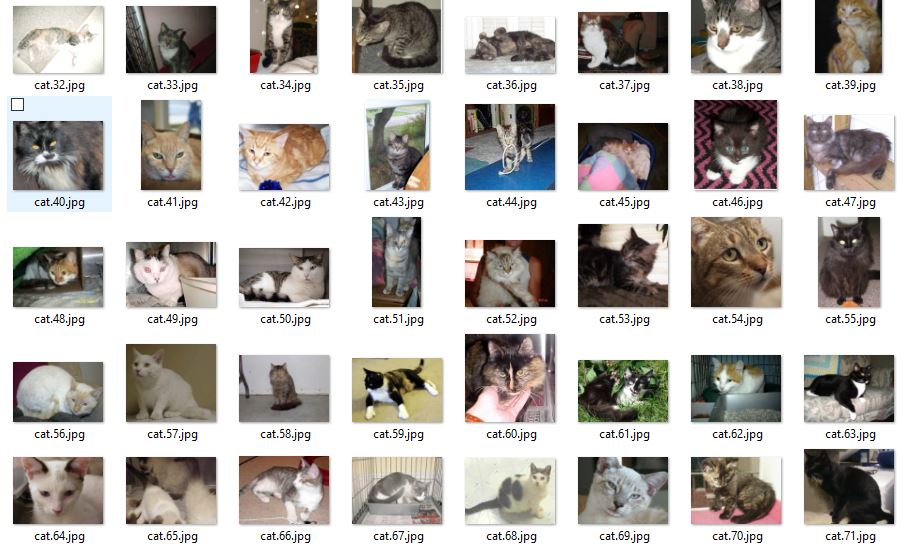

In [5]:
from IPython.display import Image
Image(filename="C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning_Keras/ConvNet basics/Training a ConvNet from scratch/cats.JPG" ,width=600, height= 200)
# Replaced the Markdown code -- ![alt text](cats.jpg ) -- with the above!

And here a sample of the dog images:

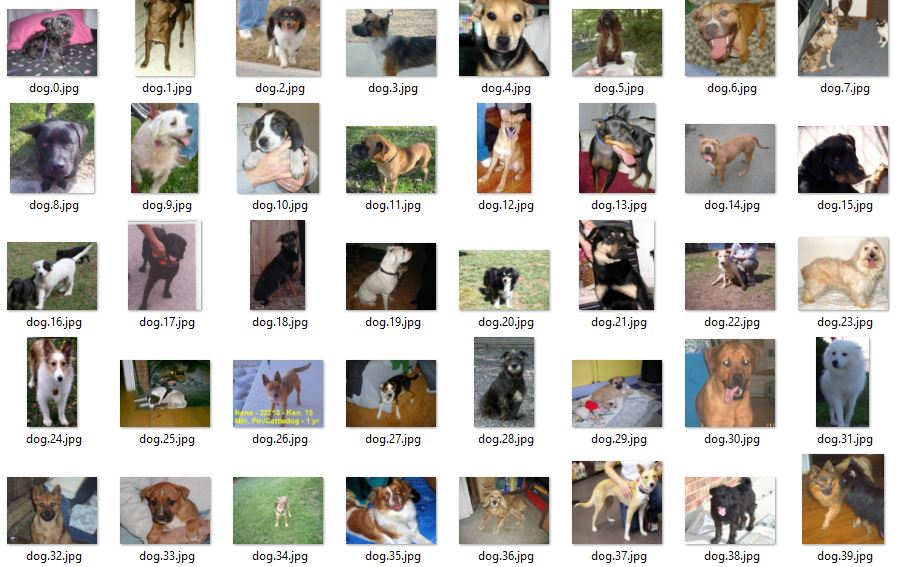

In [6]:
Image(filename="C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning_Keras/ConvNet basics/Training a ConvNet from scratch/dogs.JPG" ,width=600, height= 200)
# Replaced the Markdown code -- ![alt text](dogs.jpg ) -- with the above!

In [1]:
import os, shutil

#path to directory where the original dataset was uncompressed
original_dataset_dir = "/floyd/input/catsanddogs_12500/Dataset/" 

base_dir = "/floyd/home/cats_and_dogs_SMALL" #Note! base_dir cannot be created in input folder, which is read-only

# os.mkdir(base_dir) # NOTE! This row was run only initially to create the base_dir. 
# Trying to make same directories again resulting in error! --> File already exists!

In [2]:
train_dir = os.path.join(base_dir, "train")  # directory for training 
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

validation_dir = os.path.join(base_dir, "validation")  # directory for validation 
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

test_dir = os.path.join(base_dir, "test")  # directory for testing 
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

train_cats_dir = os.path.join(train_dir, "cats")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

train_dogs_dir = os.path.join(train_dir, "dogs")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

validation_cats_dir = os.path.join(validation_dir, "cats")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

validation_dogs_dir = os.path.join(validation_dir, "dogs")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

test_cats_dir = os.path.join(test_dir, "cats")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

test_dogs_dir = os.path.join(test_dir, "dogs")
#os.mkdir(train_dir) # NOTE AGAIN! This row was run only initially to create the ..._dir -folder in the cats_and_dogs_SMALL -folder 

# CATS
# Copies the first 1000 cat images to train_cats_dir:
fnames = ["cat.{}.jpg".format(i) for i in range (1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 cat images to validation_cats_dir:
fnames = ["cat.{}.jpg".format(i) for i in range (1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 cat images to test_cats_dir:
fnames = ["cat.{}.jpg".format(i) for i in range (1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# DOGS
# Copies the first 1000 dog images to train_dogs_dir:
fnames = ["dog.{}.jpg".format(i) for i in range (1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to validation_dogs_dir:
fnames = ["dog.{}.jpg".format(i) for i in range (1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to test_dogs_dir:
fnames = ["dog.{}.jpg".format(i) for i in range (1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [3]:
print("Total training cat images:", len(os.listdir(train_cats_dir)))
print("Total validation cat images:", len(os.listdir(validation_cats_dir)))
print("Total testing cat images:", len(os.listdir(test_cats_dir)))
print("Total training dog images:", len(os.listdir(train_dogs_dir)))
print("Total validation dog images:", len(os.listdir(validation_dogs_dir)))
print("Total testing dog images:", len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total validation cat images: 500
Total testing cat images: 500
Total training dog images: 1000
Total validation dog images: 500
Total testing dog images: 500


### Building the network
Because this is a binary-classification problem, the network ends with a single unit, a Dense layer of size 1, and a sigmoid activation. Sigmoid will encode the probability of whether the network is looking at a cat or a dog.

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", 
                        input_shape = (150, 150, 3))) #starting with input size 150x150 rather arbitrarily
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))   
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))                       
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())                      
model.add(layers.Dense(512,activation = "relu"))                       
model.add(layers.Dense(1, activation = "sigmoid"))        

Using TensorFlow backend.


Let's look how the dimensions of the feature maps change with every successive layer:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

For the compilation step the RMSprop optimizer is used, to speed up the learning. It divides the learning rate for a weight	 by a running average of the magnitudes of recent gradients for that weight. In simple terms, it sort of smoothens out the gradient descent (green line in the picture towards the goal compared to not using an optimizer, blue line). Other available optimizers include e.g. Adam, and AdaGrad.

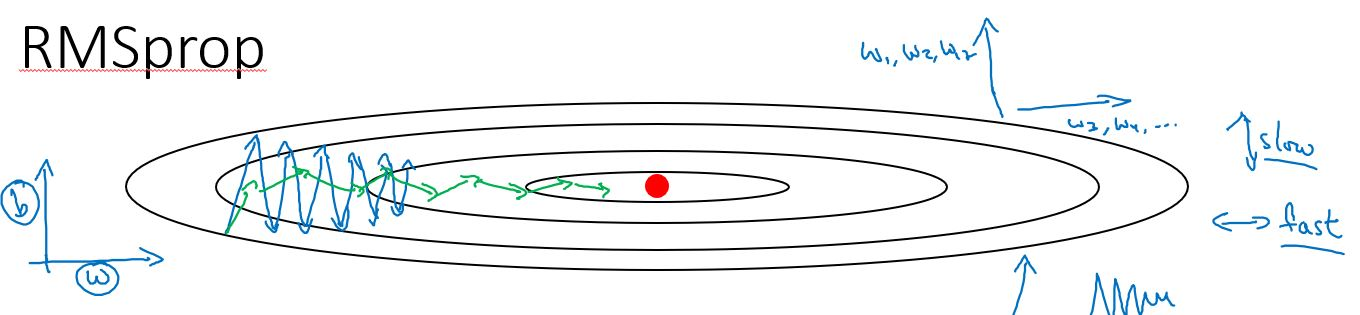

In [8]:
Image(filename="C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/DeepLearning/DeepLearning_Keras/ConvNet basics/Training a ConvNet from scratch/RMSprop.JPG" ,width=800, height= 300)


In [6]:
from keras import optimizers

model.compile(loss="binary_crossentropy", optimizer= optimizers.RMSprop(lr=0.0001), metrics=["acc"])

### Data preprocessing
 Data, currently as JPEG-files, must be formatted into appropriately preprocessed floating-point tensors before being fed into te network above. The steps are roughly as follows:
1. Read the picture files
2. Decode the JPEG content to RBG grids of pixels (Red,Blue, Green)
3. Convert these into floating-point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval
Fortunately Keras has utilities to make these steps more automated

#### Using ImageDataGenerator to read images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # all images rescaled by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size= (150, 150), batch_size=20, class_mode="binary")
#resizes all images to 150 x 150

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size= (150, 150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's look at the output of these generators. The batch size is 20 so there are 20 samples in each. Images are of shape (20, 150, 150, 3) and binary labels of shape (20, ). The generator loops endlessly over the images inteh target folder, so break must be used.

In [8]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break # Without this the genartor keeps yielding batches indefinitely!

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Because data is generated endlessly without an inserted 'break' of some kind, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. Here's where the *steps_per_epoch* argument steps in. In this case with batches of 20 samples, it will take 100 epochs until the target of 2.000 training samples is reached. <br>

### Fitting the model using a batch generator 

In [9]:
history = model.fit_generator(train_generator, steps_per_epoch= 100, epochs=30, validation_data = validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 161s 2s/step - loss: 0.6865 - acc: 0.5410 - val_loss: 0.7167 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 158s 2s/step - loss: 0.6482 - acc: 0.6255 - val_loss: 0.6295 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 159s 2s/step - loss: 0.6044 - acc: 0.6755 - val_loss: 0.6078 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 159s 2s/step - loss: 0.5673 - acc: 0.7205 - val_loss: 0.6356 - val_acc: 0.6510
Epoch 5/30
100/100 [==============================] - 162s 2s/step - loss: 0.5459 - acc: 0.7200 - val_loss: 0.6129 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 158s 2s/step - loss: 0.5185 - acc: 0.7455 - val_loss: 0.5913 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 187s 2s/step - loss: 0.4887 - acc: 0.7675 - val_loss: 0.5745 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 159s 2s/step - 

According to Francois Chollet in his book "Deep Learning with Python", from which the model is, it should reach a validation accuracy of c. 70-72%. Here I got closer to around 75%.   https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438<br>
Next, plotting the loss and accuracy:

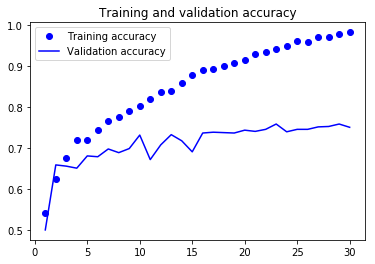

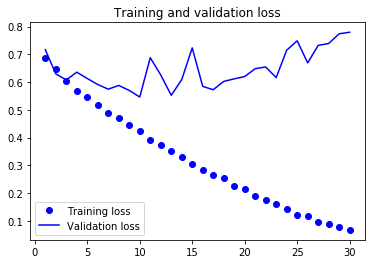

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearily over time, until it reaches nearly 100%, whereas the validation accuracy stalls at around 75%. With so few training examples (2000) overfitting is the main concern here. One specific technique trying to fix this for computer vision is data augmentation. 

### Using data augmentation
Let's see if there's any use of this, since I needed to cut the data already for the original model due to capacity issues in the processing unit.
#### Setting up a data augementation configuration via ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(rotation_range=40,        # value in degrees(0-180), a range for randomly rotating pictures
                             width_shift_range = 0.2,  # a fraction of total width/height to randomly translate pics vertically/horizontally
                             height_shift_range= 0.2,  
                             shear_range= 0.2,         # randomly applying shearing transformations (~cutting pic smaller)
                             zoom_range= 0.2,          # randomly zooming inside pictures
                             horizontal_flip= True,    # randomly flipping half the images horizontally
                             fill_mode= "nearest")     # fillng in newly created pixels appearing after rotation or width/height shift

#### Displaying some randomly augmented training images

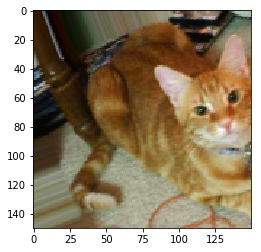

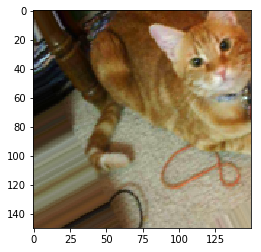

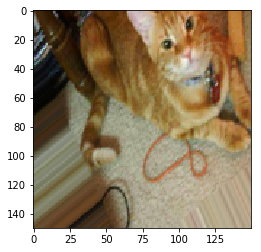

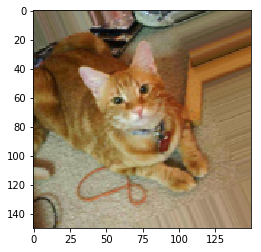

In [14]:
from keras.preprocessing import image #module with immagepreprocessig utilities

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]
img_path = fnames[345] #Chooses the image nr [n] to augment

img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resizes it 

x = image.img_to_array(img) # Converts it to numpy array with shaoe (150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):            #Generates batches of randomly transformed images.
    plt.figure(i)                                      
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:   
        break         # Loops indefinitely, so the loop needs to break at some point!
    
plt.show()

If the new network is trained with this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still highly intercorrelated. Therefore, this technique may not be enough to completely get rid of overfitting. To further fight overfitting, a *Droput* layer is added to the model, right before the final classifier.
#### Defining a new ConvNet that includes Dropout

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", 
                        input_shape = (150, 150, 3))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))   
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))                       
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())    
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = "relu"))                       
model.add(layers.Dense(1, activation = "sigmoid"))  

model.compile(loss="binary_crossentropy", 
              optimizer= optimizers.RMSprop(lr=0.0001), 
              metrics=["acc"])

#### Traing the ConvNet using data-augmentation generators

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range = 0.2,
                                   height_shift_range= 0.2,
                                   shear_range= 0.2, 
                                   zoom_range= 0.2,
                                   horizontal_flip= True,)   
test_datagen = ImageDataGenerator(rescale=1./255) # NOTE! Validation data should not be augmented!!

train_generator = train_datagen.flow_from_directory(train_dir,                #This is the target directory
                                                   target_size = (150, 150),  #Resizes all images to 150 x 150
                                                   batch_size= 32,
                                                   class_mode= "binary") #Binary labels needed since using binary_crossentropy

validation_generator = test_datagen.flow_from_directory(validation_dir,               
                                                   target_size = (150, 150),  
                                                   batch_size= 32,
                                                   class_mode= "binary")

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100, 
                             validation_data= validation_generator,
                             validation_steps= 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6924 - acc: 0.5297 - val_loss: 0.6930 - val_acc: 0.5010
Epoch 2/100
100/100 [==============================] - 33s 335ms/step - loss: 0.6823 - acc: 0.5625 - val_loss: 0.6955 - val_acc: 0.5110
Epoch 3/100
100/100 [==============================] - 34s 337ms/step - loss: 0.6728 - acc: 0.5806 - val_loss: 0.6458 - val_acc: 0.6200
Epoch 4/100
100/100 [==============================] - 34s 340ms/step - loss: 0.6606 - acc: 0.6025 - val_loss: 0.6545 - val_acc: 0.5880
Epoch 5/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6397 - acc: 0.6166 - val_loss: 0.7045 - val_acc: 0.5590
Epoch 6/100
100/100 [==============================] - 36s 360ms/step - loss: 0.6260 - acc: 0.6475 - val_loss: 0.5874 - val_acc: 0.6710
Epoch 7/100
100/100 [==============================] - 34s 338ms/step - loss: 0.6035 - acc: 0.6706 -

Looks like data-augmentation and a Drop-out layer did slightly improve rhe model. Next, saving the model for possible later use:


In [17]:
model.save("cats_and_dogs_SMALL_1.h5")

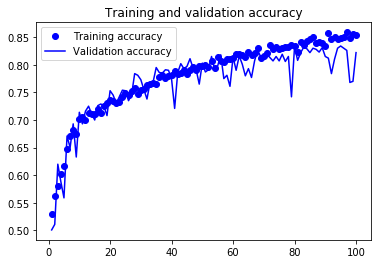

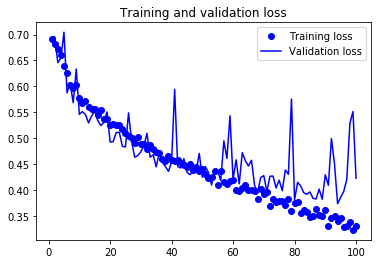

In [21]:
%matplotlib inline

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Turns out that thanks to dropout and data augmentation the model is no longer overfitting! The accuracy is above 82%, a relative improvement of almost 10% over the first, non-regularized model.